# House Price Prediction
### Multivariable Regression 

#### 1. Import Statements

In [1]:
# Dataset 
from sklearn.datasets import load_boston

# pandas 
import pandas as pd 
from pandas import DataFrame


# ML Model (Linear regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Avoid warnings
import warnings
warnings.filterwarnings('ignore')


#Features evaluation 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### 2. Gather data

In [2]:
boston_dataset = load_boston()
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [3]:
type(boston_dataset)

sklearn.utils._bunch.Bunch

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(type(boston_dataset.data))
boston_dataset.data.shape

<class 'numpy.ndarray'>


(506, 13)

In [6]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### 3. Data Exploration from Pandas module

In [7]:
# accumulating data
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

data['PRICE']=boston_dataset.target

In [8]:
# showing 1st 5 records:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# count of data
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

#### 4. Cleaning data -check for missing values

In [10]:
# to check whether to cleaning of data is required:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
# to check whether any col contains null values:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

#### 5. Visualizing data - Histograms,Distributions and Bar-Graphs
##### Price

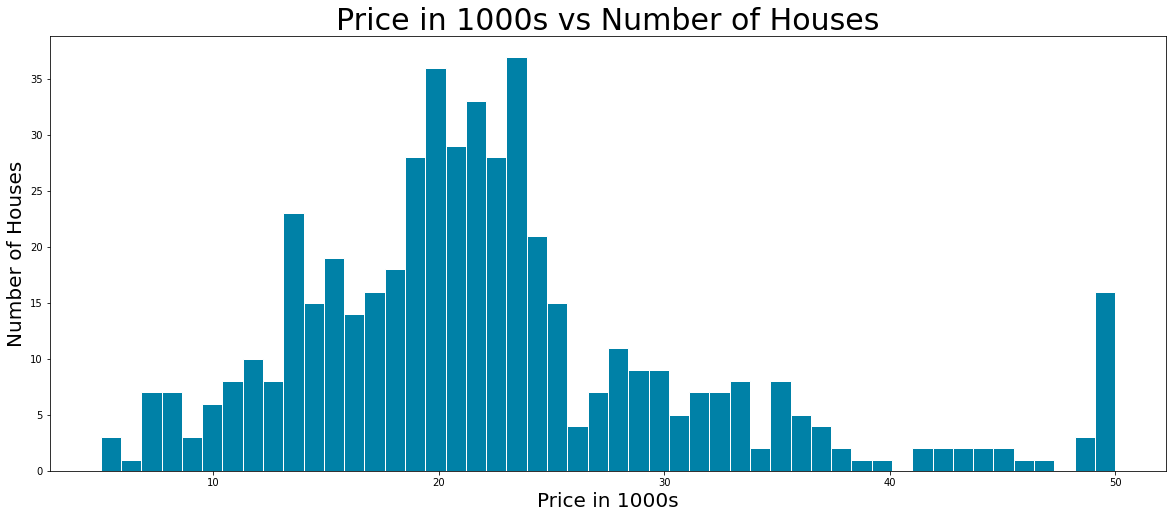

In [12]:
#histogram for price and no. of houses 
plt.figure(figsize=[20,8])
plt.hist(data['PRICE'],bins=50,ec='w',color='#0081a7')
plt.xlabel('Price in 1000s',fontsize=20)
plt.ylabel('Number of Houses',fontsize=20)
plt.title("Price in 1000s vs Number of Houses",fontsize=30)
plt.show()

This does not appear to be normally distributed 

##### Rooms

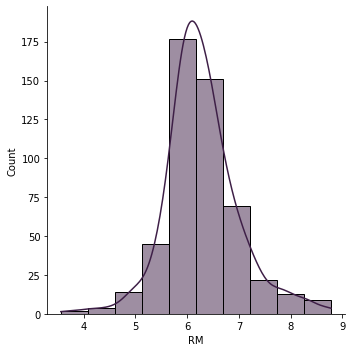

In [13]:
# plotting according to number of rooms as a parameter:
sns.displot(data['RM'],kde=True,color='#3e1f47',bins=10)
plt.show()

In [14]:
# mean average number of rooms 
data['RM'].mean()

6.284634387351787

##### Number of highways

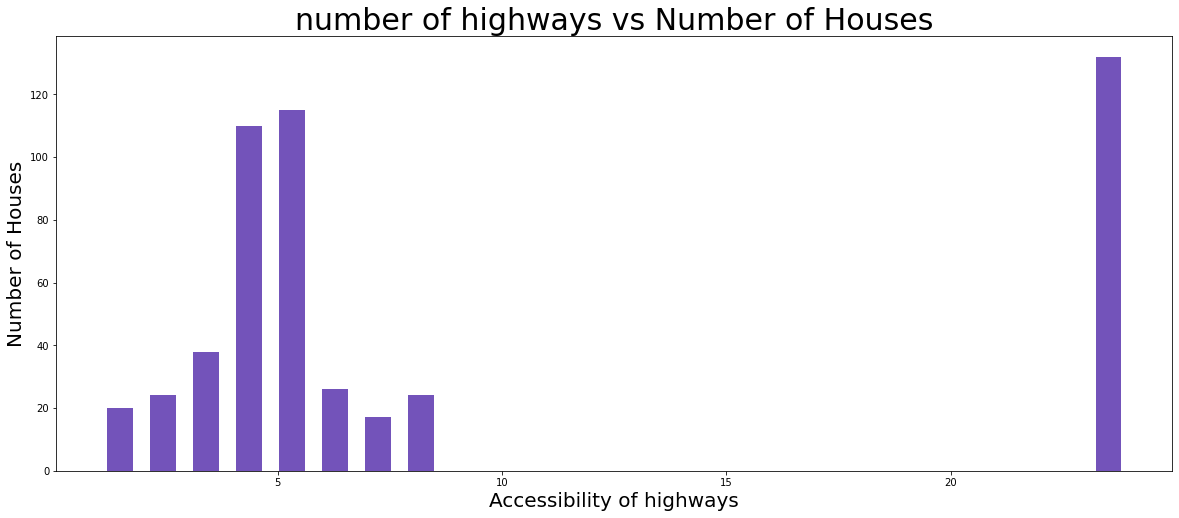

In [15]:
#histogram for rank of accessible highways  and no. of houses 
plt.figure(figsize=[20,8])
# rwidth gives gap between histograms
plt.hist(data['RAD'],bins=24,color='#7353ba',rwidth=0.6)
plt.xlabel('Accessibility of highways',fontsize=20)
plt.ylabel('Number of Houses',fontsize=20)
plt.title("number of highways vs Number of Houses",fontsize=30)
plt.show()

In [16]:
#  frequency of each rank given to Accessibility of highways 
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [17]:
# count of houses present near and far off the river:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

##### 6. Descriptive Statistics 

In [18]:
print('the min price of a house in Boston is ',data['PRICE'].min())
print('the max price of a house in Boston is ',data['PRICE'].max())

the min price of a house in Boston is  5.0
the max price of a house in Boston is  50.0


In [19]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### 7. Correlation

##### $$ \rho _{XY}=corr(X,Y) $$
##### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [20]:
data.corr() # Pearson/Kendall/Spearman Correlation Coefficient 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Graphical depiction of the correlations of different features

In [21]:
mask=np.zeros_like(data.corr())
triangle_corr=np.triu_indices_from(data.corr())
mask[triangle_corr]=True


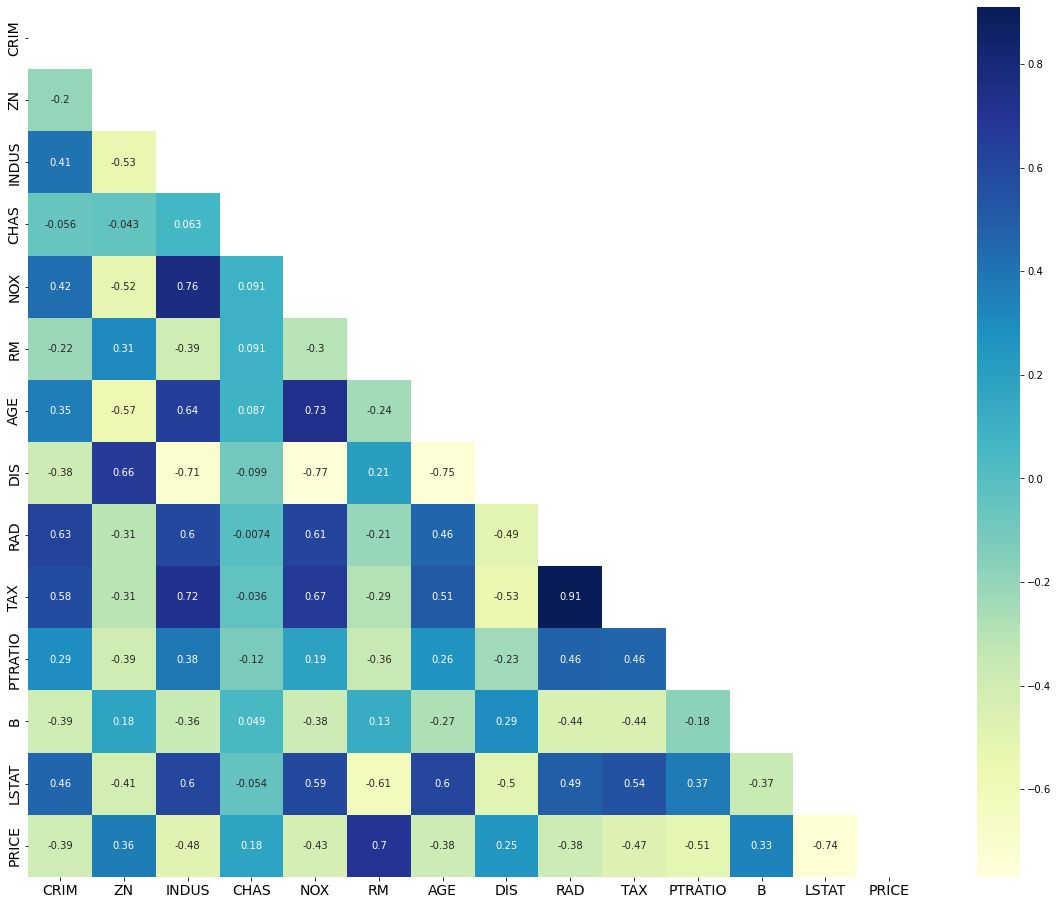

In [22]:
plt.figure(figsize=[20,16])
sns.heatmap(data.corr(),annot=True,mask=mask,cmap='YlGnBu')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

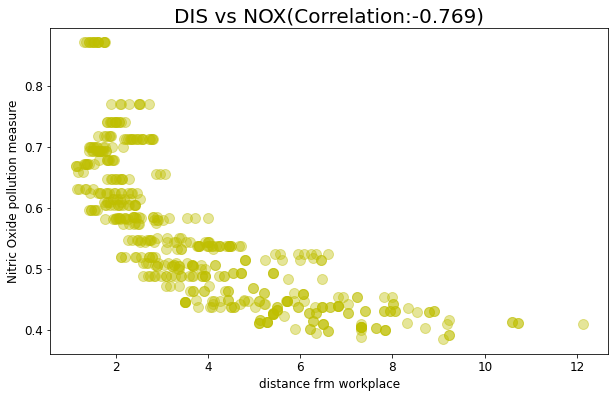

In [23]:
dis_nox_corr=round(data['NOX'].corr(data['DIS']),3)


plt.figure(figsize=[10,6])
plt.scatter(data['DIS'],data['NOX'],s=100,color='y',alpha=0.4)
plt.xlabel('distance frm workplace',fontsize=12)
plt.ylabel('Nitric Oxide pollution measure',fontsize=12)
plt.title(f"DIS vs NOX(Correlation:{dis_nox_corr})",fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### This shows that distance frm workplace and pollution levels are positively correlated

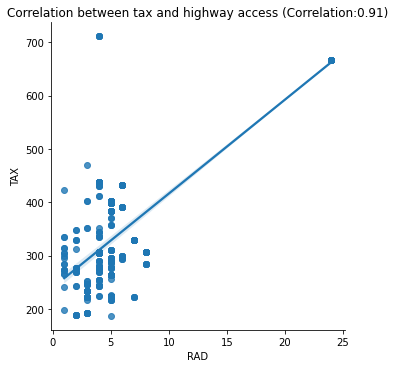

In [24]:
sns.lmplot(x='RAD',y='TAX',data=data)
plt.title(f"Correlation between tax and highway access (Correlation:{round(data['RAD'].corr(data['TAX']),3)})")
plt.show()

##### This depicts that taxes and highway access features are positively correlated 

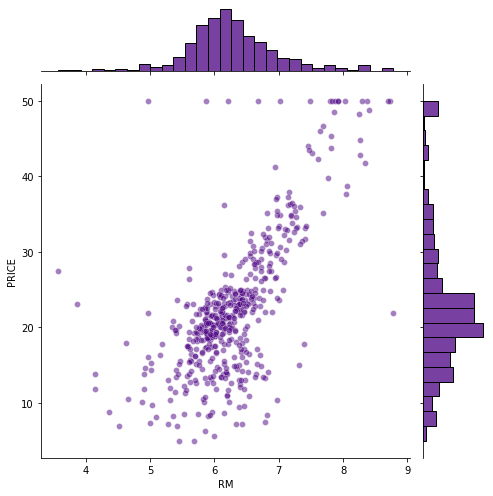

In [25]:
sns.jointplot(x=data['RM'],y=data['PRICE'],color='indigo',height=7,alpha=0.5) #==from course scatter plot
plt.show()

In [26]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

##### This depicts that the number of rooms and price are positively correlated!

#### LM Plot for rooms and price 

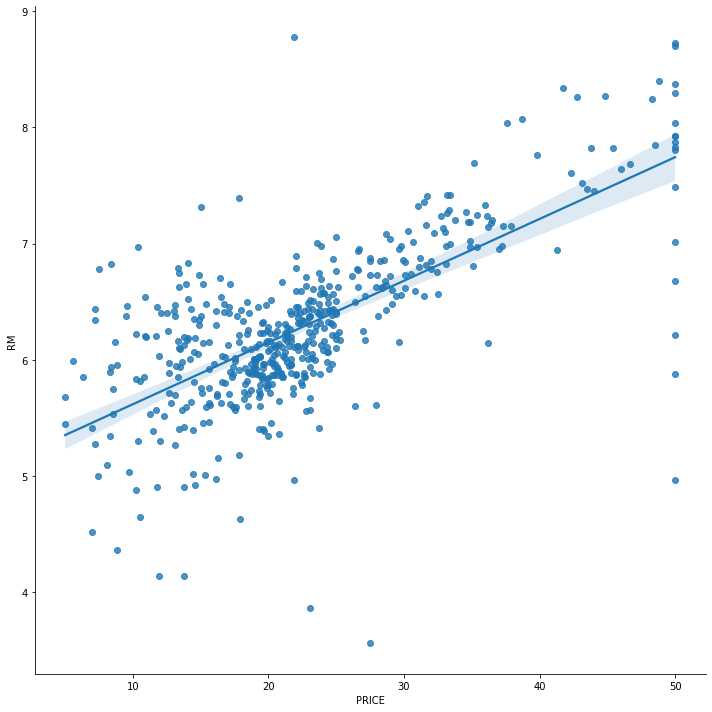

In [27]:
sns.lmplot(x='PRICE',y='RM',data=data,height=10)
plt.show()

#### LM Plot of all the features 

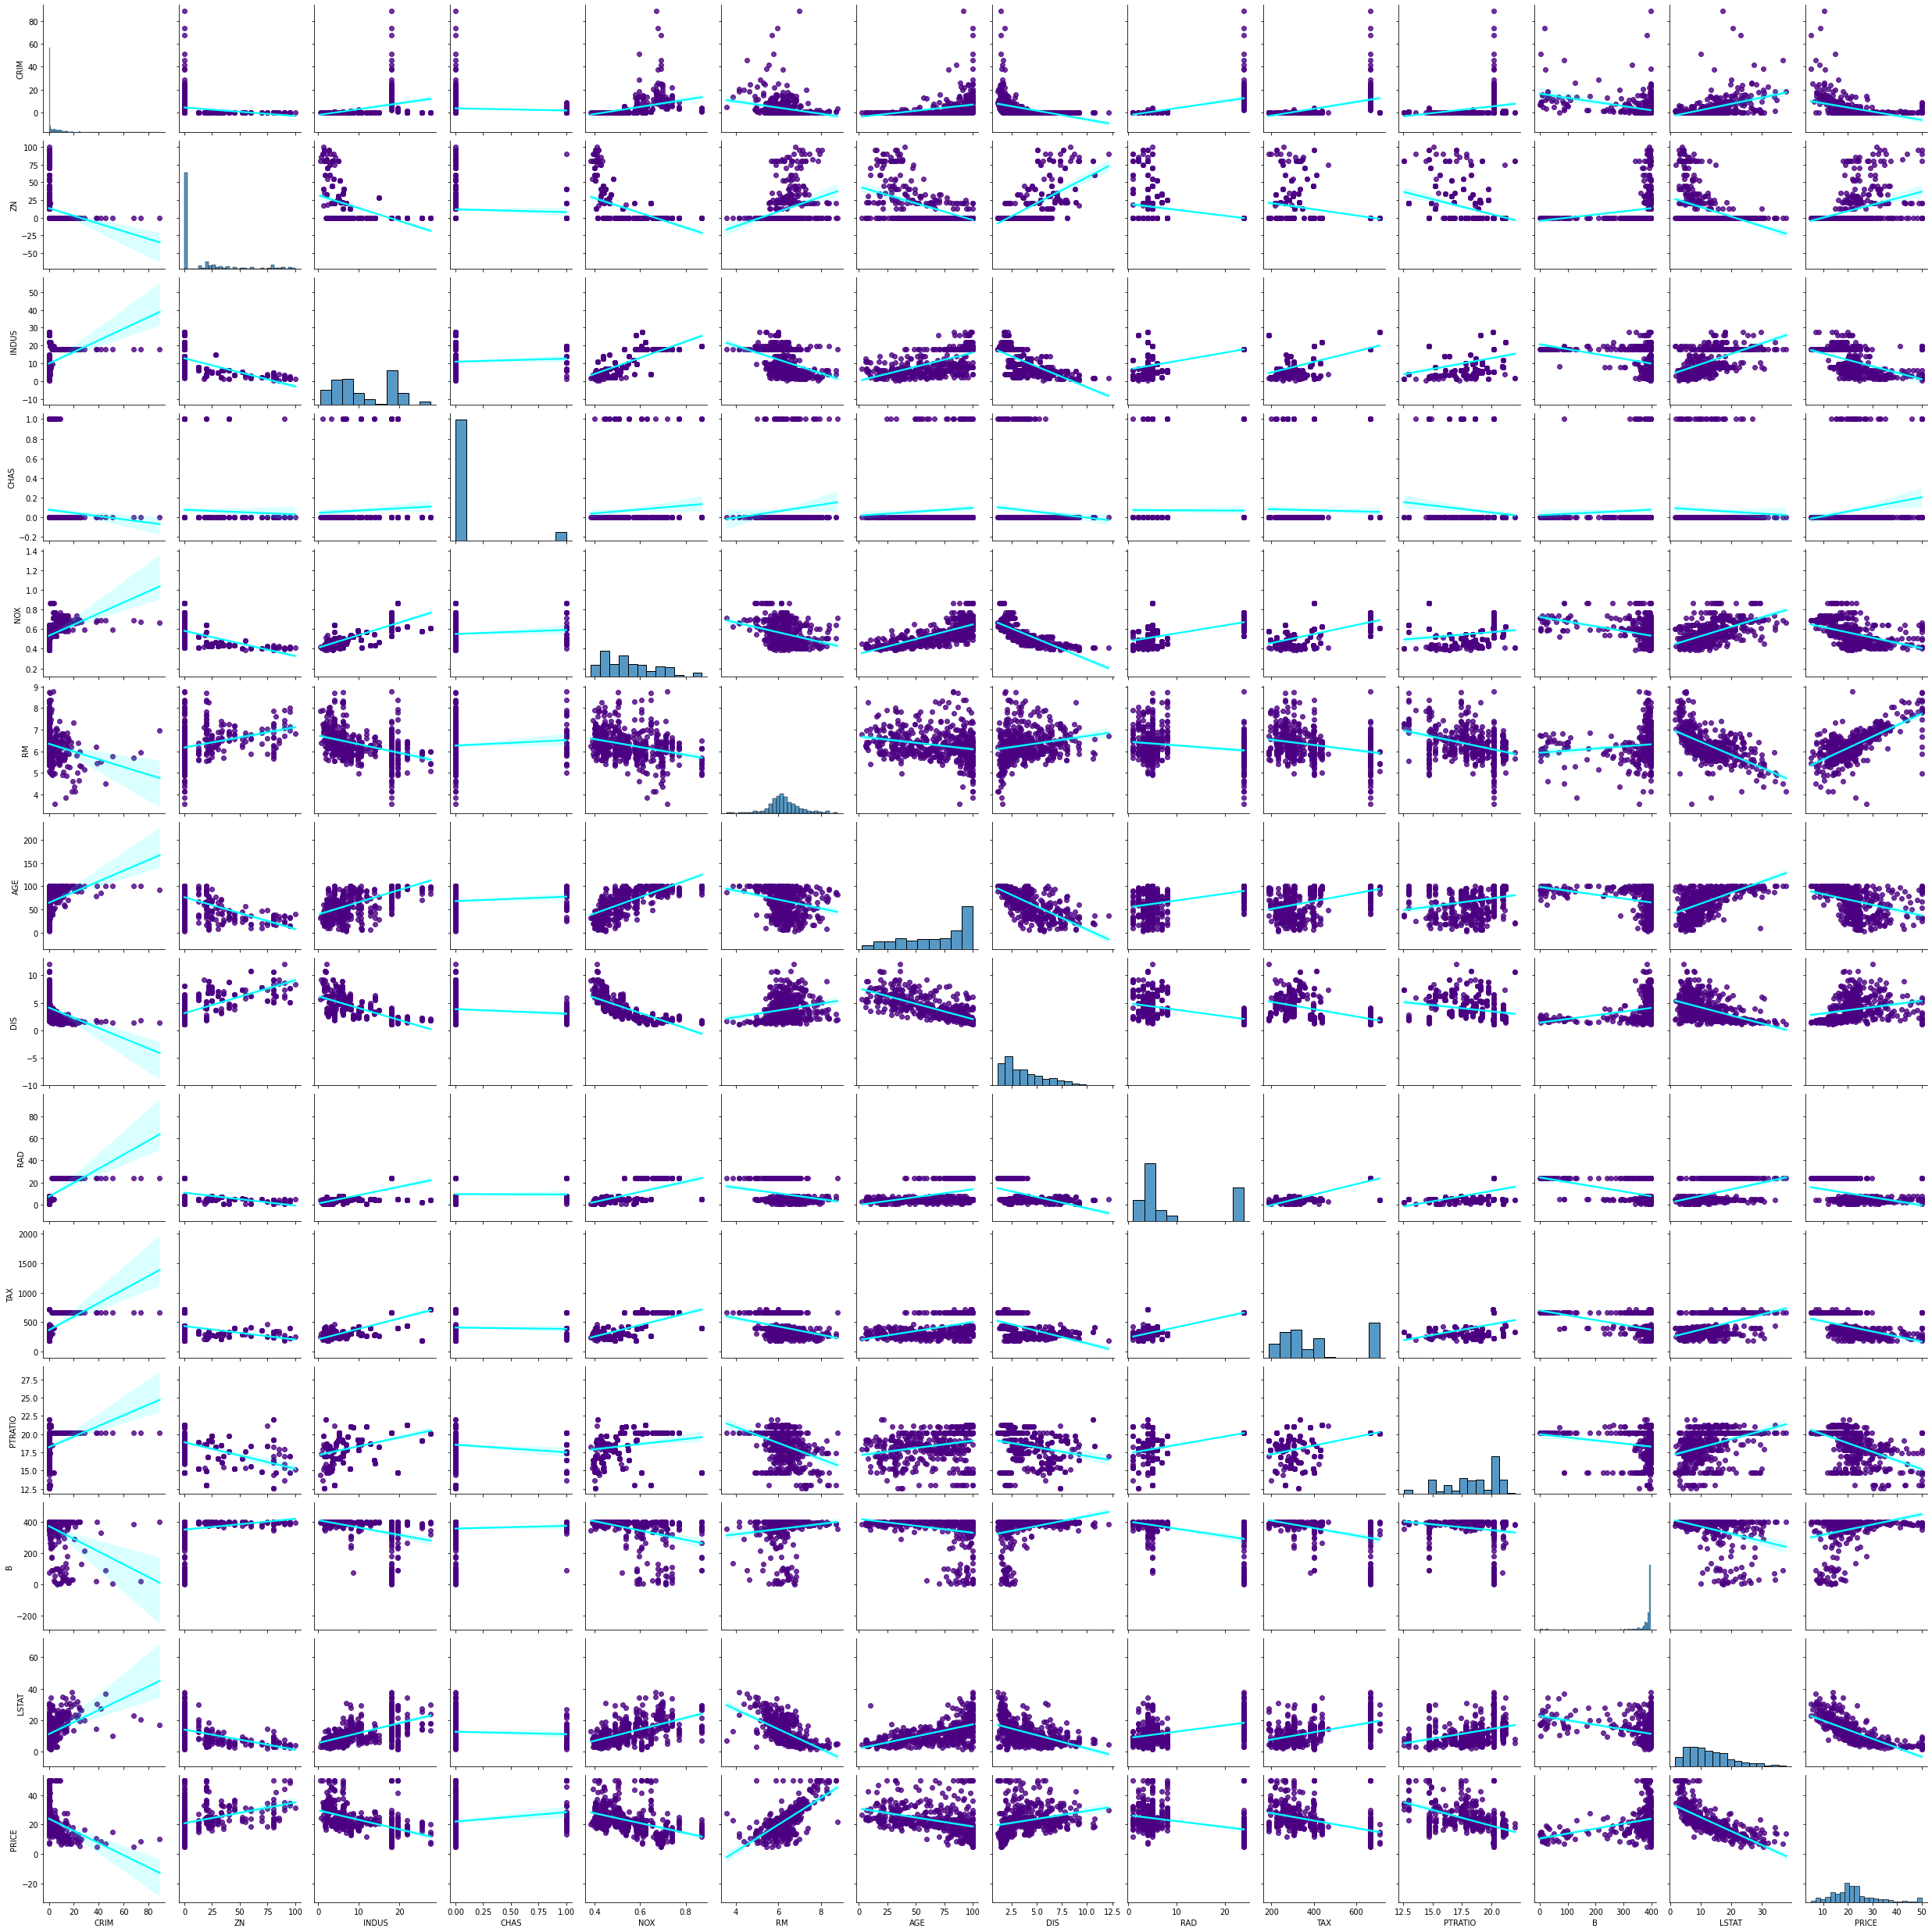

CPU times: user 1min 47s, sys: 1.4 s, total: 1min 49s
Wall time: 50.1 s


In [28]:
%%time
sns.pairplot(data,kind='reg',plot_kws={"color":'indigo','line_kws':{"color":'cyan'}})
plt.show()

##### 8. Training & Test Data Split

In [29]:
# The price is split and seperated from rest of the features 
prices=data['PRICE']
features=data.drop('PRICE',axis=1)


X_train,X_test,y_train,y_test=train_test_split(features,prices,random_state=10,test_size=0.2)

In [30]:
#Testing the test size as its given as 80-20 split
len(X_train)/len(features)

0.7984189723320159

In [31]:
#buliding the regression model
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

##### 9. Multivariable Regression 

In [32]:
print("Training data r-squared:",regr.score(X_train,y_train))
print("Testing data r-squared:",regr.score(X_test,y_test))

print('Intercept = ',regr.intercept_)
pd.DataFrame(data=regr.coef_,columns=['coef'],index=X_train.columns)

Training data r-squared: 0.750121534530608
Testing data r-squared: 0.670933983911565
Intercept =  36.53305138282463


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


##### 10. Data Transformation 

In [33]:
data["PRICE"].skew() # Actually skew should be equal to zero for a perfect data representation

1.1080984082549072

In [34]:
y_log=np.log(data["PRICE"])
#  log function is taken to increase the accuracy

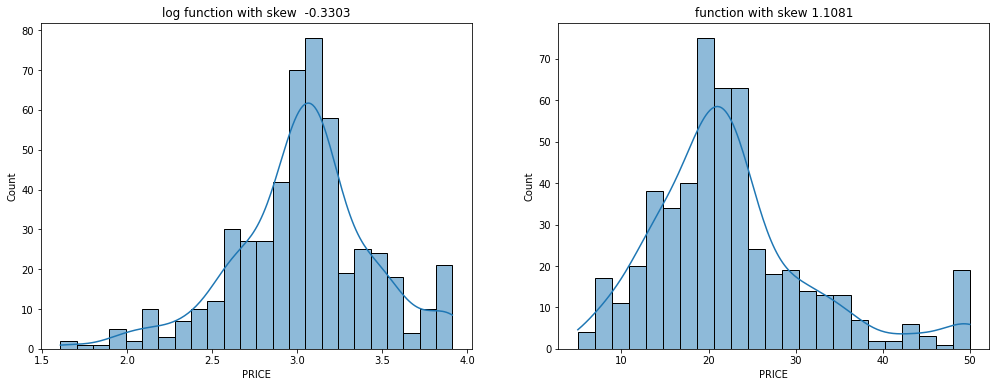

In [35]:
plt.figure(figsize=[17,6])
plt.subplot(1,2,1)
plt.title(f"log function with skew  {np.round(y_log.skew(),4)}")
sns.histplot(y_log,kde=True)
plt.subplot(1,2,2)
plt.title(f"function with skew {np.round(data['PRICE'].skew(),4)}")
sns.histplot(data["PRICE"],kde=True)
plt.show()

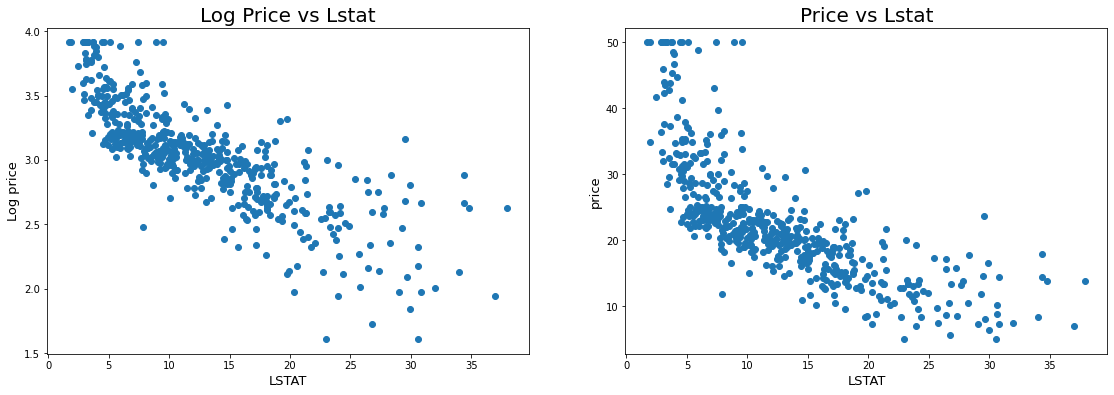

In [36]:
transformed_data=features
transformed_data["LOG_PRICE"]=y_log


plt.figure(figsize=[19,6])


plt.subplot(1,2,1)
plt.scatter(x="LSTAT",y="LOG_PRICE",data=transformed_data)
plt.xlabel('LSTAT',fontsize=13)
plt.ylabel('Log price',fontsize=13)
plt.title('Log Price vs Lstat',fontsize=20)


plt.subplot(1,2,2)
plt.xlabel('LSTAT',fontsize=13)
plt.ylabel('price',fontsize=13)
plt.title('Price vs Lstat',fontsize=20)
plt.scatter(x="LSTAT",y="PRICE",data=data)


plt.show()

##### 11. Regression Using Log Prices

In [37]:
price=np.log(data['PRICE'])
features=data.drop('PRICE',axis=1)


X_train,X_test,y_train,y_test=train_test_split(features,price,random_state=10,test_size=0.2)

reg=LinearRegression()
reg.fit(X_train,y_train)
print("Training data r-squared:",reg.score(X_train,y_train))
print("Testing data r-squared:",reg.score(X_test,y_test))

print('Intercept = ',reg.intercept_)
pd.DataFrame(data=reg.coef_,columns=['coef'],index=X_train.columns)


Training data r-squared: 0.7930234826697584
Testing data r-squared: 0.744692230626075
Intercept =  4.059943871775207


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [38]:
# Finding the antilog of the value of charles river(dollar value of that parameter)
np.e**(0.080331) 

1.0836456950439142

This means that people are ready to give 1.08k dollars more to stay near the charles river

##### 12. P values and evaluating coefficients 

In [39]:
const_val=sm.add_constant(X_train)
model=sm.OLS(y_train,const_val) #ordinary least squares

result=model.fit()

pd.DataFrame({"coef":result.params,"pvalues":round(result.pvalues,3)})
#here the if the p values is greater than 0.05 
#the assumption is that parameter does not highly affect the house price. 

,coef,pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


##### 13. Testing For Multicollinearity

$$ TAX=\alpha _0 RM+\alpha _1 NOX+....+\alpha _{12}LSTAT $$

$$ VIF _{TAX}=\frac{1}{(1 - R _{  TAX} ^2)}$$

In [40]:
variance_inflation_factor(exog=const_val.values,exog_idx=1)

1.714525044393249

In [41]:
# same result as above but different syntax
vif=[variance_inflation_factor(exog=const_val.values,exog_idx=i) for i in range(len(const_val.columns)) ]
pd.DataFrame({"coef_name":const_val.columns[1:],"vif":np.around(vif,2)[1:]})

,coef_name,vif
0,CRIM,1.71
1,ZN,2.33
2,INDUS,3.94
3,CHAS,1.08
4,NOX,4.41
5,RM,1.84
6,AGE,3.33
7,DIS,4.22
8,RAD,7.31
9,TAX,8.51


In [42]:
# original data analysis 
const_val=sm.add_constant(X_train)
model=sm.OLS(y_train,const_val)

result=model.fit()

orig_data=pd.DataFrame({"coef":result.params,"pvalues":round(result.pvalues,3)})


print("R-square",result.rsquared)
print("BIC:",result.bic)

R-square 0.7930234826697583
BIC: -139.74997769478875


In [43]:
# Reduced data analysis with elimination of INDUS 
const_val=sm.add_constant(X_train)
const_val=const_val.drop(['INDUS'],axis=1)
model=sm.OLS(y_train,const_val)

result=model.fit()

red_data=pd.DataFrame({"coef":result.params,"pvalues":round(result.pvalues,3)})


print("R-square",result.rsquared)
print("BIC:",result.bic)

R-square 0.7927126289415163
BIC: -145.14508855591163


In [44]:
# Reduced data analysis with elimination of AGE 
const_val=sm.add_constant(X_train)
const_val=const_val.drop(['AGE',"INDUS"],axis=1)
model=sm.OLS(y_train,const_val)

result=model.fit()

red_data_age_ind=pd.DataFrame({"coef":result.params,"pvalues":round(result.pvalues,3)})


print("R-square",result.rsquared)
print("BIC:",result.bic)

R-square 0.7918657661852815
BIC: -149.49934294224678


In [45]:
frames=[orig_data,red_data_age_ind]
pd.concat(frames,axis=1)

,coef,pvalues,coef,pvalues
const,4.059944,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN
CHAS,0.080331,0.038,0.086449,0.025
NOX,-0.704068,0.000,-0.616448,0.000
RM,0.073404,0.000,0.076133,0.000
AGE,0.000763,0.209,NaN,NaN
DIS,-0.047633,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.013743,0.000


##### 14. Residual and Residual Plots

##### Checking to see if dropping some features improves the model or not

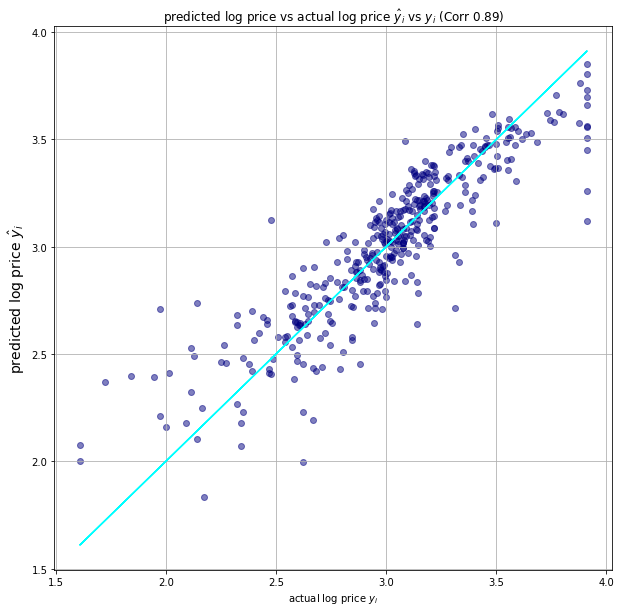

In [46]:
#Modified model:transformed prices(log prices) and dropping 2 features 

price=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE'],axis=1)


X_train,X_test,y_train,y_test=train_test_split(features,price,random_state=10,test_size=0.2)

#Using Statsmodel
const_val=sm.add_constant(X_train)
model=sm.OLS(y_train,const_val)

result=model.fit()
## these 2 methods below give the same meaning ##
#residuals=y_train-result.fittedvalues
#result.resid
plt.figure(figsize=[10,10])
plt.scatter(x=y_train,y=result.fittedvalues,c='navy',alpha=0.5)
plt.plot(y_train,y_train,c='cyan')
plt.grid()
plt.ylabel("predicted log price $ \hat y_i$",fontsize=14)
plt.xlabel("actual log price $ y _i$")
plt.title(f"predicted log price vs actual log price $\hat y _i $ vs $ y _i $ (Corr {round(y_train.corr(result.fittedvalues),2)})")
plt.show()


reduced_mse=round(result.mse_resid,3)
reduced_rsquare=round(result.rsquared,3)

##### Comparison of log prices and actual prices

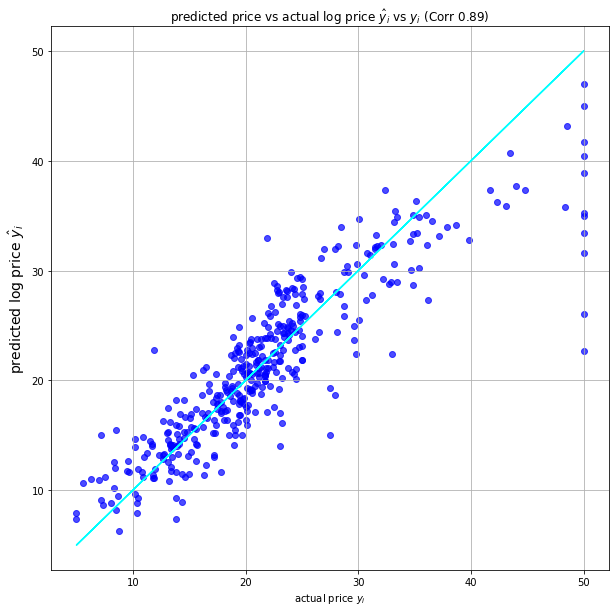

In [47]:
#Modified model:transformed prices(log prices) and dropping 2 features 

price=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE'],axis=1)


X_train,X_test,y_train,y_test=train_test_split(features,price,random_state=10,test_size=0.2)

#Using Statsmodel
const_val=sm.add_constant(X_train)
model=sm.OLS(y_train,const_val)

result=model.fit()
## these 2 methods below give the same meaning ##
#residuals=y_train-result.fittedvalues
#result.resid
plt.figure(figsize=[10,10])
plt.scatter(x=np.e**y_train,y=np.e**result.fittedvalues,c='blue',alpha=0.7)
plt.plot(np.e**y_train,np.e**y_train,c='cyan')
plt.grid()
plt.ylabel("predicted log price $ \hat y_i$",fontsize=14)
plt.xlabel("actual price $ y _i$")
plt.title(f"predicted price vs actual log price $\hat y _i $ vs $ y _i $ (Corr {round(y_train.corr(result.fittedvalues),2)})")
plt.show()

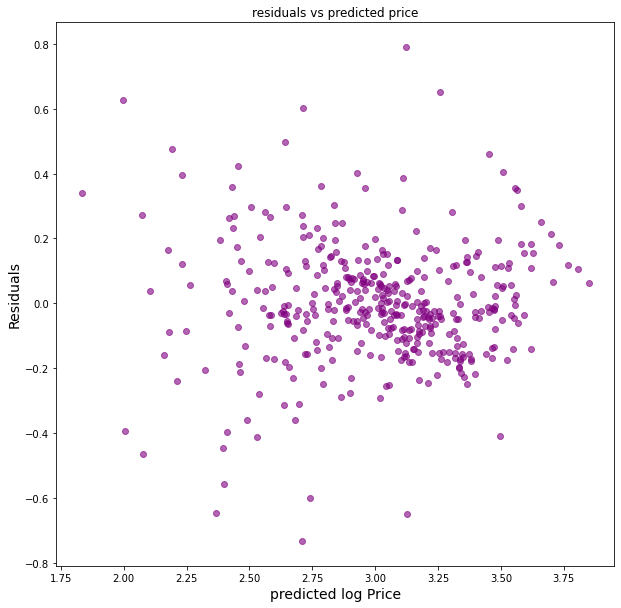

In [48]:
plt.figure(figsize=[10,10])
plt.scatter(x=result.fittedvalues,y=result.resid,c='purple',alpha=0.6)
plt.ylabel("Residuals",fontsize=14)
plt.xlabel("predicted log Price",fontsize=14)
plt.title('residuals vs predicted price')
plt.show()

###### No pattern observed so its a good decision to omit indus and age feature(coz they have high pvalue than threshold)

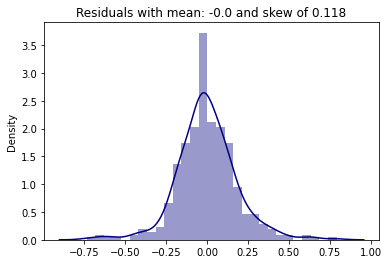

In [49]:
sns.distplot(result.resid,color='navy')
plt.title(f'Residuals with mean: {round(result.resid.mean(),3)} and skew of {round(result.resid.skew(),3)}')
plt.show()

##### Comparison between predicted and actual price

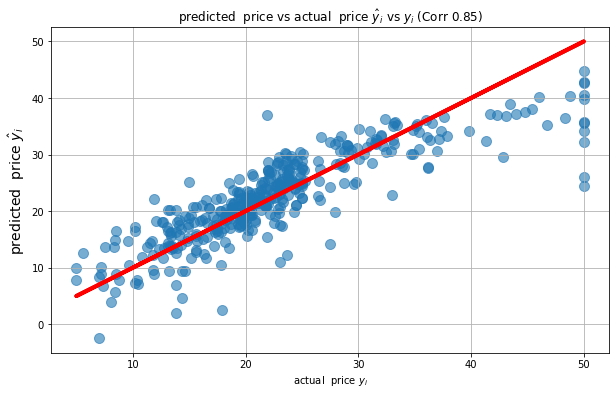

In [50]:
price=data['PRICE']
features=data.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,price,test_size=0.2,random_state=100)

const_val=sm.add_constant(X_train)
model=sm.OLS(y_train,const_val)

re=model.fit()
plt.figure(figsize=[10,6])

plt.scatter(y_train,re.fittedvalues,s=100,alpha=0.6)
plt.plot(y_train,y_train,linewidth=4,color='r')
plt.grid()
plt.ylabel("predicted  price $ \hat y_i$",fontsize=14)
plt.xlabel("actual  price $ y _i$")
plt.title(f"predicted  price vs actual  price $\hat y _i $ vs $ y _i $ (Corr {round(y_train.corr(result.fittedvalues),2)})")
plt.show()

original_mse=round(re.mse_resid,3)
original_rquare=round(re.rsquared,3)

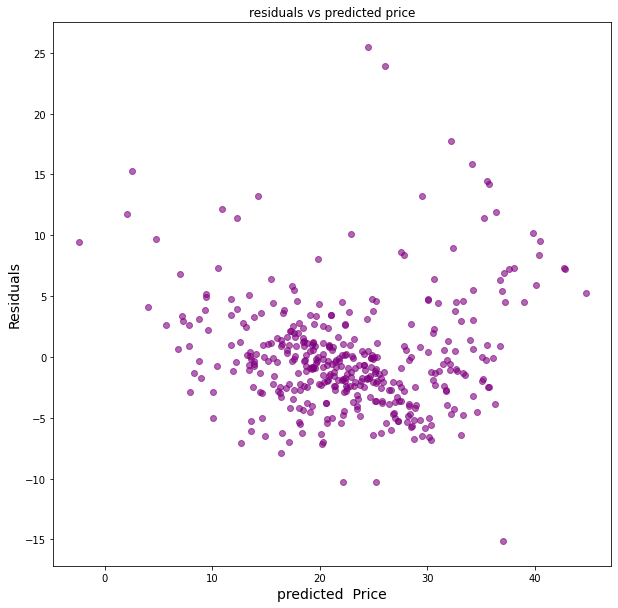

In [51]:
plt.figure(figsize=[10,10])
plt.scatter(x=re.fittedvalues,y=re.resid,c='purple',alpha=0.6)
plt.ylabel("Residuals",fontsize=14)
plt.xlabel("predicted  Price",fontsize=14)
plt.title('residuals vs predicted price')
plt.show()

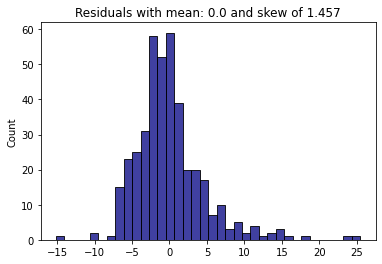

In [52]:
sns.histplot(re.resid,color='navy')
plt.title(f'Residuals with mean: {round(re.resid.mean(),3)} and skew of {round(re.resid.skew(),3)}')
plt.show()

###### So considering log prices did improve the model 

##### Checking the model perfomance by removing the crucial features

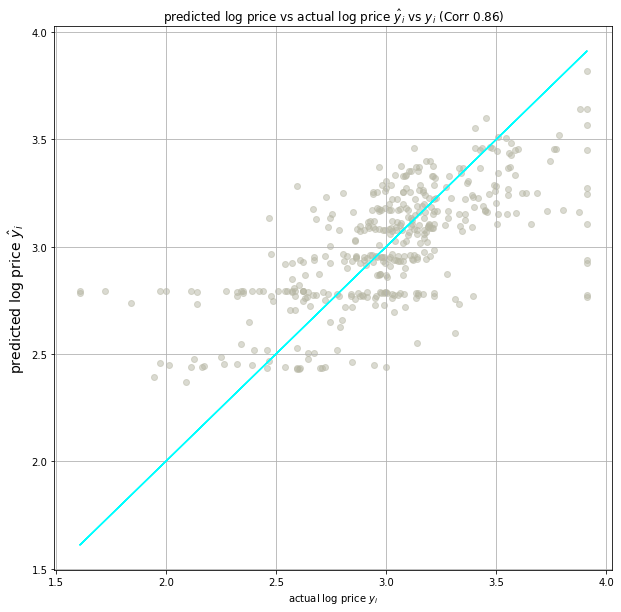

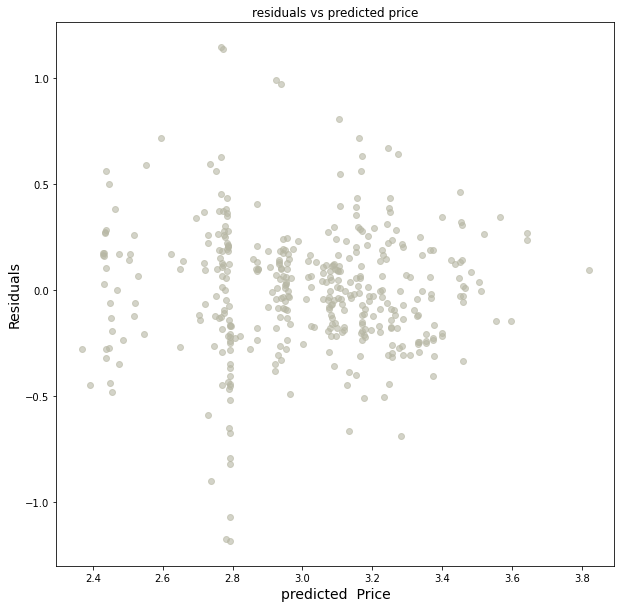

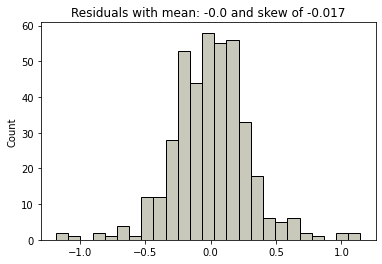

In [53]:


price=np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE','RM','LSTAT','NOX','CRIM'],axis=1)


X_train,X_test,y_train,y_test=train_test_split(features,price,random_state=10,test_size=0.2)

#Using Statsmodel
const_val=sm.add_constant(X_train)
model=sm.OLS(y_train,const_val)

res=model.fit()
## these 2 methods below give the same meaning ##
#residuals=y_train-result.fittedvalues
#result.resid
plt.figure(figsize=[10,10])
plt.scatter(x=y_train,y=res.fittedvalues,c='#b7b7a4',alpha=0.5)
plt.plot(y_train,y_train,c='cyan')
plt.grid()
plt.ylabel("predicted log price $ \hat y_i$",fontsize=14)
plt.xlabel("actual log price $ y _i$")
plt.title(f"predicted log price vs actual log price $\hat y _i $ vs $ y _i $ (Corr {round(y_train.corr(re.fittedvalues),2)})")
plt.show()
plt.figure(figsize=[10,10])
plt.scatter(x=res.fittedvalues,y=res.resid,c='#b7b7a4',alpha=0.6)
plt.ylabel("Residuals",fontsize=14)
plt.xlabel("predicted  Price",fontsize=14)
plt.title('residuals vs predicted price')
plt.show()

sns.histplot(res.resid,color='#b7b7a4')
plt.title(f'Residuals with mean: {round(res.resid.mean(),3)} and skew of {round(res.resid.skew(),3)}')
plt.show()

omitted_mse=round(res.mse_resid,3)
omitted_rsquare=round(res.rsquared,3)

###### This can be seen that the residuals have a pattern which is not a good indication of model accuracy
###### This is mainly coz of removing the features which play a vital role in predicting the house prices

In [54]:
pd.DataFrame({'MSE':[reduced_mse,original_mse,omitted_mse],
              'RMSE':np.sqrt([reduced_mse,original_mse,omitted_mse]),
              'R-squared':[reduced_rsquare,original_rquare,omitted_rsquare]},index=['reduced','original','omitted'])

,MSE,RMSE,R-squared
reduced,0.035,0.187083,0.792
original,22.427,4.735715,0.734
omitted,0.090,0.300000,0.460


In [55]:
lower=np.log(30)-(0.187083)
upper=np.log(30)+(0.187083)
print("Range in log :-",lower,"-",upper)
print("Range:-",np.e**lower*1000,"-",np.e**upper*1000)

Range in log :- 3.2141143816621556 - 3.5882803816621553
Range:- 24881.246862366716 - 36171.820688024454


In [56]:
lower=np.log(30)-(2*0.187083)
upper=np.log(30)+(2*0.187083)
print("Range in log :-",lower,"-",upper)
print("Range:-",np.e**lower*1000,"-",np.e**upper*1000)

Range in log :- 3.0270313816621552 - 3.7753633816621557
Range:- 20635.881514201108 - 43613.35372955315


## Prediction of prices is next

## Thank You!